In [7]:
#Importing Necessary Libraries

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [9]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [10]:
data.shape 

(200, 5)

We have 200 rows and 5 columns in our datasets, Our Target variable(Sales) is continuous in nature, hence we will focus only on regression models.

Also, Unnamed columns does not help us in any way and hence it should be removed.

In [11]:
data.drop(columns = ['Unnamed: 0'], inplace = True)

In [12]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
data.isnull().sum() # Checking Null values

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [14]:
# there are no null values in our dataset.  let's first do the EDA part

# Check relation with target variable 

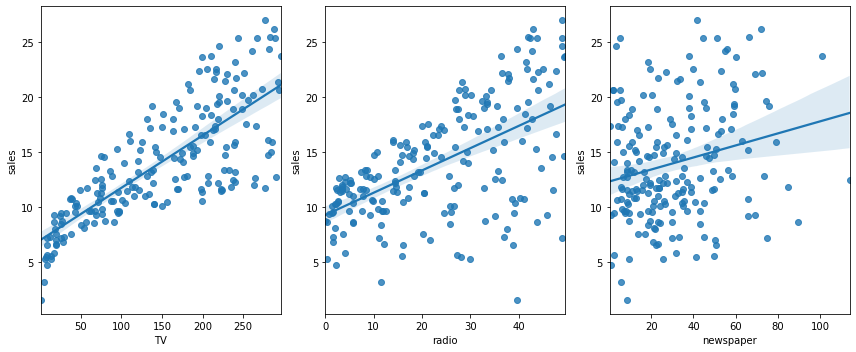

In [15]:
plt.figure(figsize = (12,5), facecolor = 'white')
plotnumber = 1
for column in data:
    if plotnumber <=3:
        ax = plt.subplot(1,3,plotnumber)
        sns.regplot(x=data[column], y="sales", data=data)
    plotnumber+=1
plt.tight_layout()

From the above plot we can infer that advertisement through TV is highly effective for sales, followed by Radio advertisement.

# Checking for Outliers

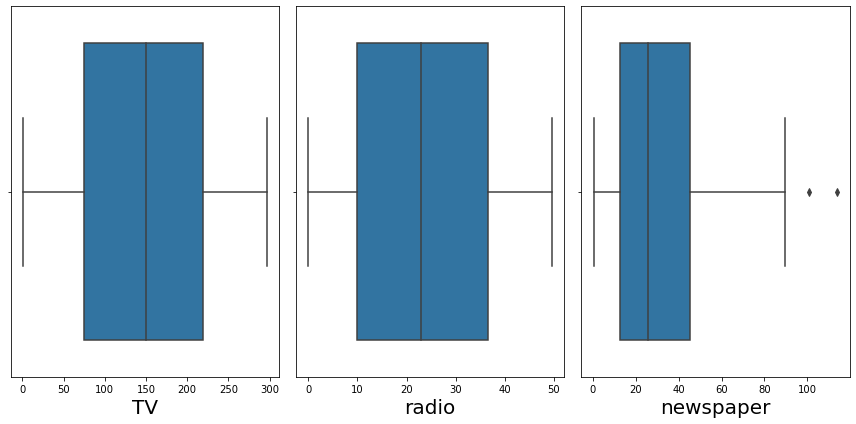

In [16]:
plt.figure(figsize = (12,6), facecolor = 'white')
plotnumber = 1
for column in data:
    if plotnumber <= 3:
        ax = plt.subplot(1,3,plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column, fontsize= 20)
    plotnumber+=1
plt.tight_layout()


We can see that there are outliers in Newspaper column, Let's us apply IQR methoid to remove the outliers.

# IQR method

In [17]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3-q1
out_newspaper = (q3.newspaper + (1.5*iqr.newspaper))
out_newspaper

93.625

In [18]:
index = np.where(data['newspaper']>out_newspaper)
index

(array([ 16, 101], dtype=int64),)

In [19]:
data = data.drop(data.index[index])
data.shape

(198, 4)

In [20]:
data.reset_index()

,index,TV,radio,newspaper,sales
0,0,230.1,37.8,69.2,22.1
1,1,44.5,39.3,45.1,10.4
2,2,17.2,45.9,69.3,9.3
3,3,151.5,41.3,58.5,18.5
4,4,180.8,10.8,58.4,12.9
...,...,...,...,...,...
193,195,38.2,3.7,13.8,7.6
194,196,94.2,4.9,8.1,9.7
195,197,177.0,9.3,6.4,12.8
196,198,283.6,42.0,66.2,25.5


In [21]:
data.describe()

,TV,radio,newspaper,sales
count,198.000000,198.000000,198.000000,198.000000
mean,146.688384,23.130808,29.777273,13.980808
std,85.443221,14.862111,20.446303,5.196097
min,0.700000,0.000000,0.300000,1.600000
25%,74.800000,9.925000,12.650000,10.325000
50%,149.750000,22.400000,25.600000,12.900000
75%,218.475000,36.325000,44.050000,17.375000
max,293.600000,49.600000,89.400000,27.000000


In [22]:
data.drop('sales', axis = 1).corrwith(data.sales) # correlation with sales

TV           0.779121
radio        0.576748
newspaper    0.219555
dtype: float64

Here again we can see that TV is highly correlated with sales, followed by radio. Now let's check the skewness in our data.

# Checking Skewness

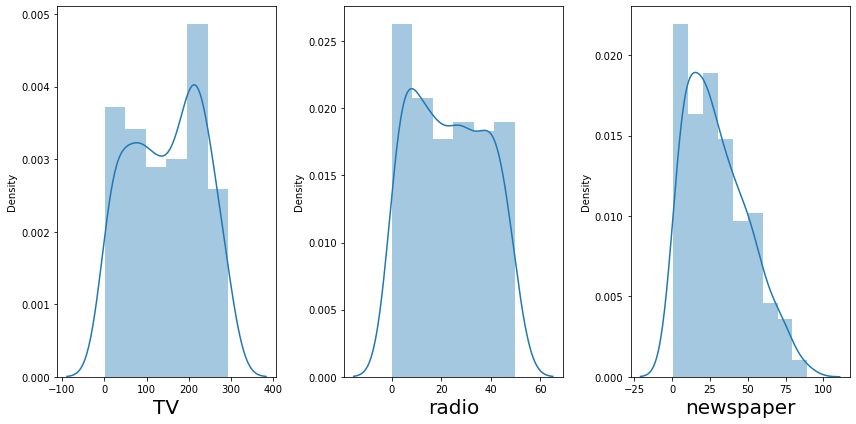

In [23]:
plt.figure(figsize = (12,6), facecolor = 'white')
plotnumber = 1
for column in data:
    if plotnumber <= 3:
        ax = plt.subplot(1,3,plotnumber)
        sns.distplot(x=data[column])
        plt.xlabel(column, fontsize= 20)
    plotnumber+=1
plt.tight_layout()


Our data is distributed normal distribution like

In [24]:
#Dividing into features and labels
y = data['sales']
x = data.drop(columns = ['sales'])

# Scaling

In [25]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Train test Split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 21)

# Linear regression Model

In [27]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [28]:
regression.score(x_train, y_train)

0.8825512746017693

In [29]:
regression.score(x_test, y_test)

0.9262002210878196

In [30]:
#92.62

# Lasso regression

In [31]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
lasscv = LassoCV(alphas = None, normalize = True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [32]:
alpha = lasscv.alpha_ # finding alpha 
alpha

0.011844458248959123

In [33]:
lasso_reg = Lasso(alpha)  # Training our model with alpha
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.011844458248959123)

In [34]:
lasso_reg.score(x_train, y_train)

0.8825305084644643

In [35]:
#88.25%

In [36]:
lassor_pred = lasso_reg.predict(x_test)

In [37]:
lasso_reg.score(x_test, y_test)

0.9264006881696193

In [38]:
#92.64%

In [39]:
from sklearn import metrics
metrics.r2_score(y_test, lassor_pred) #R2_Score

0.9264006881696193

# Ridge Regression

In [40]:
ridgecv = RidgeCV(alphas = np.arange(0.001, 0.1, 0.001), normalize = True)

In [41]:
ridgecv.fit(x_train, y_train) # Training for alpha

RidgeCV(alphas=array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099]),
        normalize=True)

In [42]:
ridgecv.alpha_ # finding alpha

0.002

In [43]:
ridge_model  = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(x_train, y_train) # training our model with alpha

Ridge(alpha=0.002)

In [44]:
ridge_model.score(x_train, y_train)

0.8825512744265968

In [45]:
#88.22%

In [46]:
ridge_pred = ridge_model.predict(x_test)

In [47]:
metrics.r2_score(y_test, ridge_pred)# R2 Score

0.926200547211834

In [48]:
#92.62%

# Ada-Boost regressor

In [49]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()

In [50]:
ada.fit(x_train, y_train) # Model Training

AdaBoostRegressor()

In [51]:
ada.score(x_train, y_train)

0.9769925789421517

In [52]:
#97.95%

In [53]:
ada_pred = ada.predict(x_test) #prediction

In [54]:
metrics.r2_score(y_test, ada_pred)# R2 Score

0.9606227581419249

In [55]:
#96.13%

In [56]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 5) #without hyperparameter tuning

In [57]:
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=5)

In [58]:
rf.score(x_train, y_train)

0.992902177288206

In [59]:
rf_y_pred = rf.predict(x_test)

In [60]:
metrics.r2_score(y_test, rf_y_pred)# R2 Score

0.9780768092474537

In [61]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[13,18],
         'max_depth':[2,10],
         'min_samples_split':[4,8],
         'min_samples_leaf':[2,5],
         }

         
grd = GridSearchCV(rf, param_grid = params)
grd.fit(x_train, y_train)
print('best_param = >', grd.best_params_)

best_param = > {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 18}


In [62]:
RF = RandomForestRegressor(max_depth=10, min_samples_leaf=2,
                       min_samples_split=4, n_estimators=18)

In [63]:
RF.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=4,
                      n_estimators=18)

In [64]:
RF.score(x_train, y_train)

0.993721827196151

In [65]:
RF_y_pred = RF.predict(x_test)

In [66]:
metrics.r2_score(y_test, RF_y_pred)# R2 Score

0.9798100404808081

In [67]:
#98.13%

We can see that our score slightly improves with hyperparameter tuning

We can see that in above 5 diffrent models, Random forest Regression model is giving us the best score. Let's save our model.

In [68]:
import pickle
filename = "Advertising sales channel"
pickle.dump(RF, open(filename,'wb'))